# Titanic Survival Prediction
Меня зовут Акылай, я учусь в 10 классе и начинаю изучать анализ данных и машинное обучение. Этот проект — моё первое практическое задание в этой сфере.

**О проекте**
Крушение RMS Titanic 15 апреля 1912 года стало одной из самых известных морских катастроф в истории. Погибло 1502 человека из 2224 пассажиров и членов экипажа. Одной из причин высокой смертности было недостаточное количество спасательных шлюпок.
Цель проекта — проанализировать, какие группы пассажиров были более или менее вероятны к выживанию, и построить модель машинного обучения, которая предсказывает, кто выжил.


**Что демонстрирует проект**
В этом проекте используются базовые инструменты анализа данных и машинного обучения на Python:
Работа с данными с помощью Pandas
Очистка и подготовка данных
Визуализация данных с Matplotlib и Seaborn
Анализ зависимостей признаков и выживаемости
Построение моделей машинного обучения:
Логистическая регрессия
SVM (3 ядра)
Random Forest
Оценка точности моделей с использованием кросс-валидации

**Используемые библиотеки**
NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, StatsModels

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных
Сначала загружаем тренировочный и тестовый набор данных.



In [2]:
# Загрузка данных и обзор данных
train_data = pd.read_csv(r"C:\Users\Акылай\OneDrive\Desktop\my git\titanic\data\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Загрузка данных тестового набора
test_data  = pd.read_csv(r"C:\Users\Акылай\OneDrive\Desktop\my git\titanic\data\test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary (Словарь данных)

- **Survived**: Выжили (0 = Нет, 1 = Да)  
- **Pclass**: Класс билета (1 = 1-й, 2 = 2-й, 3 = 3-й)  
- **SibSp**: Количество братьев и сестер/супругов на борту «Титаника»  
- **Parch**: Количество родителей/детей на борту «Титаника»  
- **Ticket**: Номер билета  
- **Cabin**: Номер каюты  
- **Embarked**: Порт отправления (C = Шербур, Q = Куинстаун, S = Саутгемптон)  

## Размеры набора данных

В нашем обучающем наборе данных **891 строка** и **12 столбцов**.


In [4]:
train_data.shape

(891, 12)

In [5]:
test_data.shape

(418, 11)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info()

# Анализ пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
train_data.isnull().sum()

# Визуализация пропущенных значений с помощью тепловой карты

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()
# Визуализация пропущенных значений с помощью тепловой карты

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Гистограммы для категориальных признаков

Мы можем визуализировать распределение выживших по разным категориальным признакам:  

- **Pclass** – Класс билета  
- **Sex** – Пол  
- **SibSp** – Количество братьев/сестер и супругов на борту  
- **Parch** – Количество родителей и детей на борту  
- **Embarked** – Порт отправления  
- **Cabin** – Номер каюты


In [11]:
# Функция для построения столбчатой диаграммы выживаемости по заданной характеристике
def bar_chart(feature):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    df.plot(kind='bar', stacked=True, figsize=(11, 6))  
    plt.title(f'Survival by {feature}')
    plt.show()


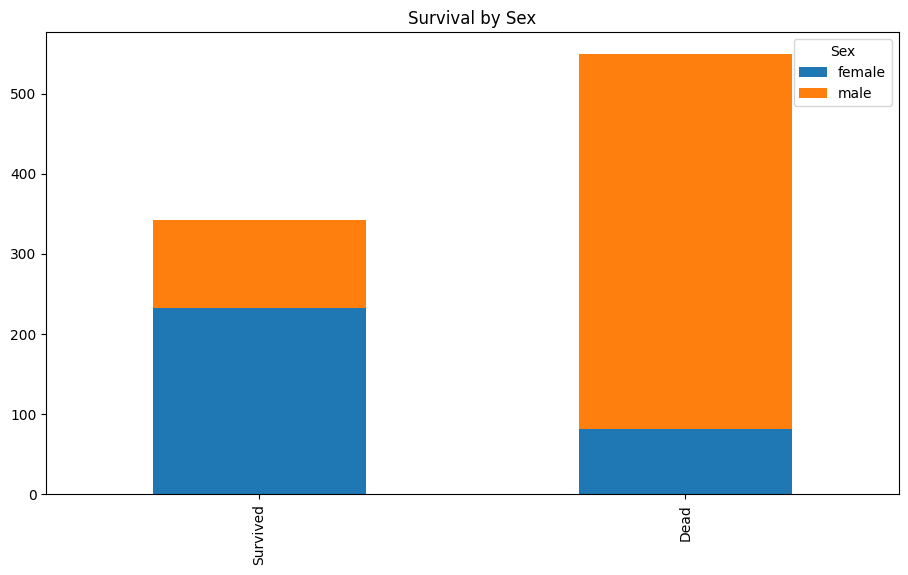

In [14]:
bar_chart('Sex')

График подтверждает, что **женщины чаще выживали, чем мужчины**.


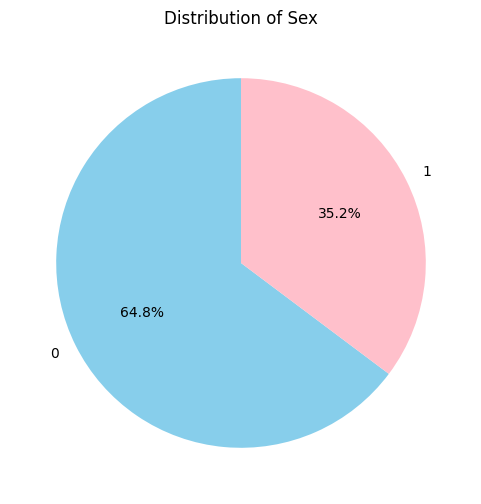

In [34]:
sex_counts = train_data['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','pink'])
plt.title("Distribution of Sex")
plt.show()


распределение по полу в процентах


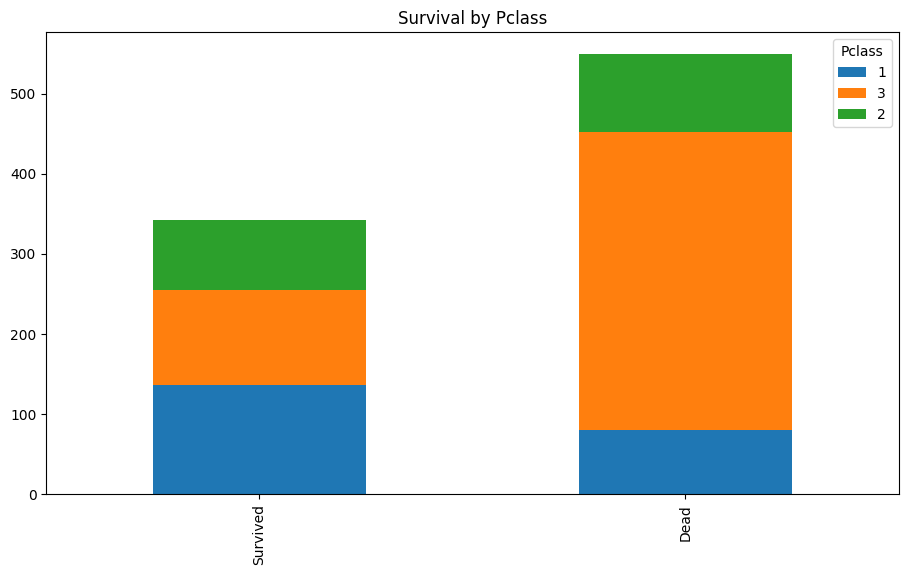

In [13]:
bar_chart('Pclass')

График подтверждает, что **пассажиры 1-го класса чаще выживали**, а **пассажиры 3-го класса чаще погибали**.


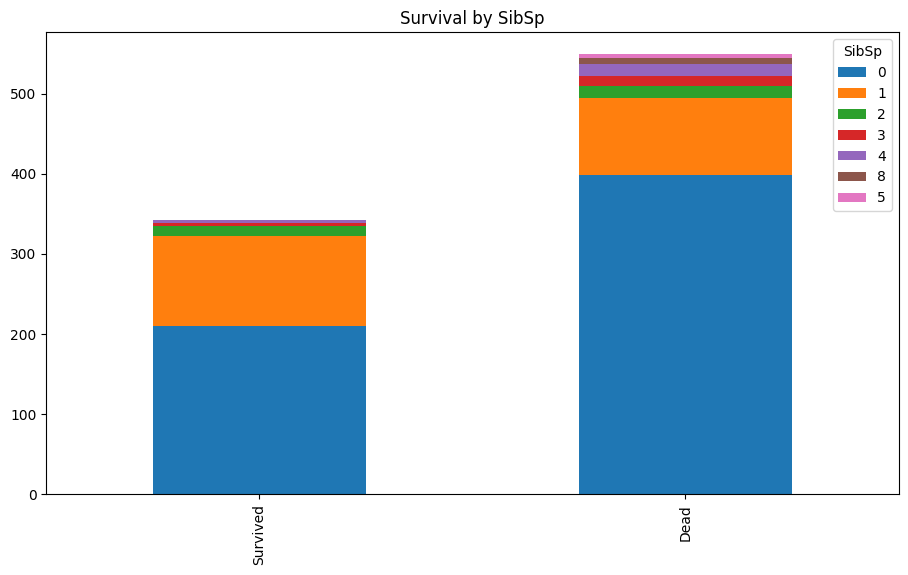

In [12]:
bar_chart('SibSp')

- Человек, находившийся на борту с более чем 2 братьями/супругами, чаще выживал.  
- Человек, находившийся на борту **без братьев/супругов**, чаще погибал.


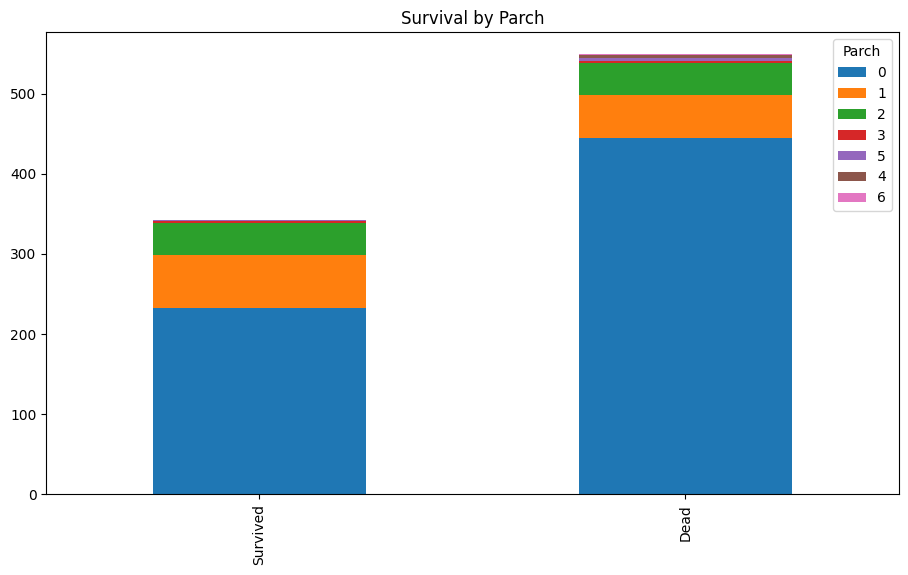

In [15]:
bar_chart('Parch')

- Человек с более чем 2 родителями/детьми чаще выживал.  
- Человек, находившийся **один**, чаще погибал.


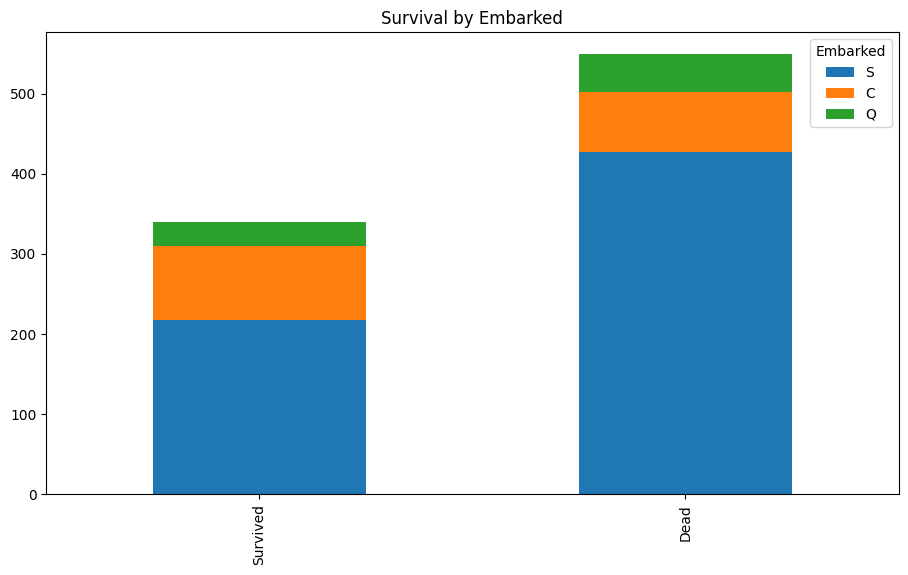

In [43]:
bar_chart('Embarked')

- Пассажиры, севшие в **Шербур (C)**, немного чаще выживали.  
- Пассажиры, севшие в **Куинстаун (Q)** и **Саутгемптон (S)**, чаще погибали.


## 2. Feature engineering (Создание новых признаков)

Feature engineering — это процесс использования знаний о данных для создания новых признаков, которые помогают алгоритмам машинного обучения работать эффективнее.  

Feature vector — это n-мерный вектор числовых признаков, представляющий объект.  
Многие алгоритмы машинного обучения требуют числового представления объектов для обработки и статистического анализа.


In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 Признак Title (обращение в имени пассажира)

Объединим тренировочный и тестовый наборы данных для обработки:


In [18]:
train_test_data = [train_data, test_data] # объединение наборов данных для обработки

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1824875826.py:4: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [19]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [20]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

## Title map
Mr : 0
Miss : 1
Mrs: 2
Others: 3

In [21]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    # Заполнение пропущенных значений в столбце 'Title' наиболее частым значением

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


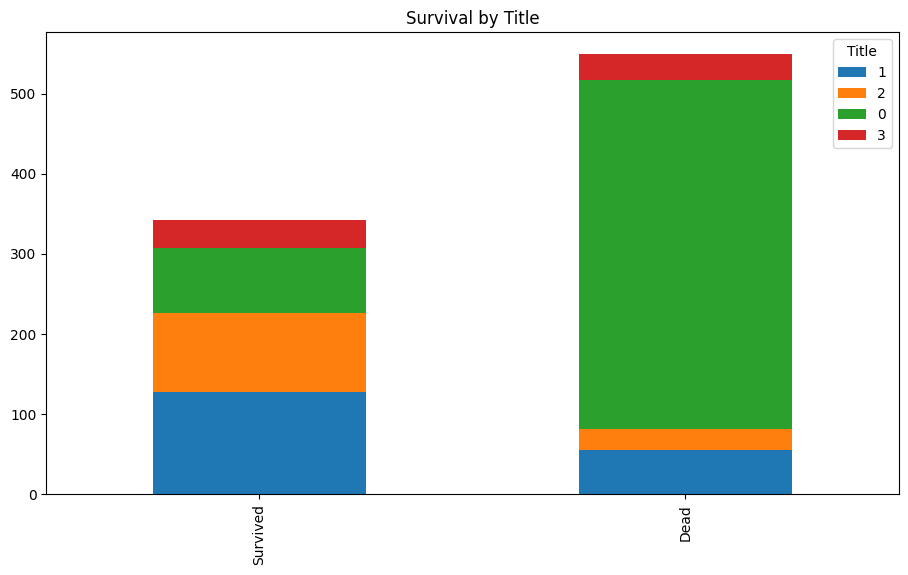

In [25]:
bar_chart('Title')

In [26]:
# Удаление столбца 'Name' из обоих наборов данных
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 2.2 Пол (Sex)

Преобразуем пол в числовой формат:  
- male: 0  
- female: 1


In [29]:
# Преобразование столбца 'Sex' в числовой формат    
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

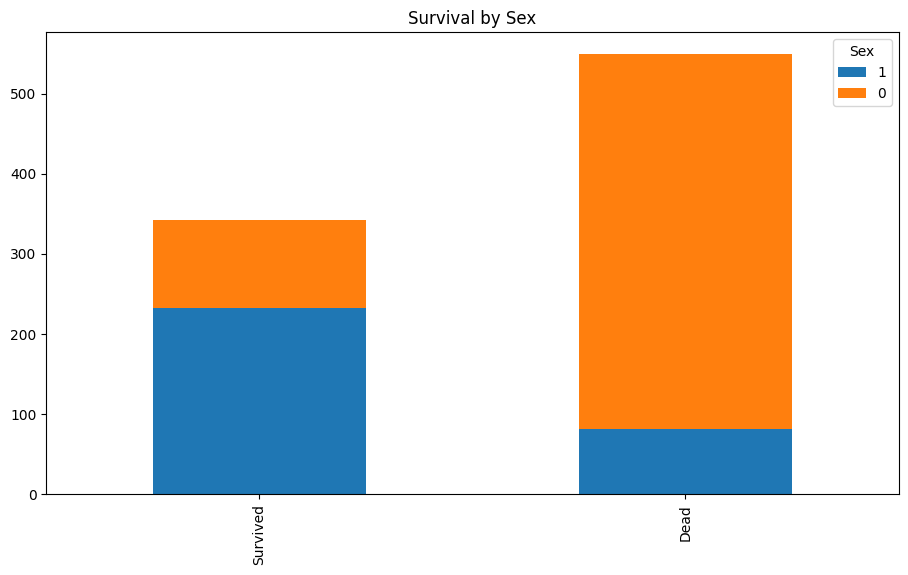

In [30]:
bar_chart('Sex')

### 2.3 Возраст (Age)

Некоторые значения возраста отсутствуют.  
Заполним пропущенные значения медианным возрастом для каждого титула (Mr, Mrs, Miss, Others).


In [31]:
train_data.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [32]:
# Заполнение пропущенных значений в столбце 'Age' медианным значением по группам 'Title'
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1181466945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1181466945.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [36]:
# Проверка заполнения пропущенных значений
train_data.head(30)
train_data.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

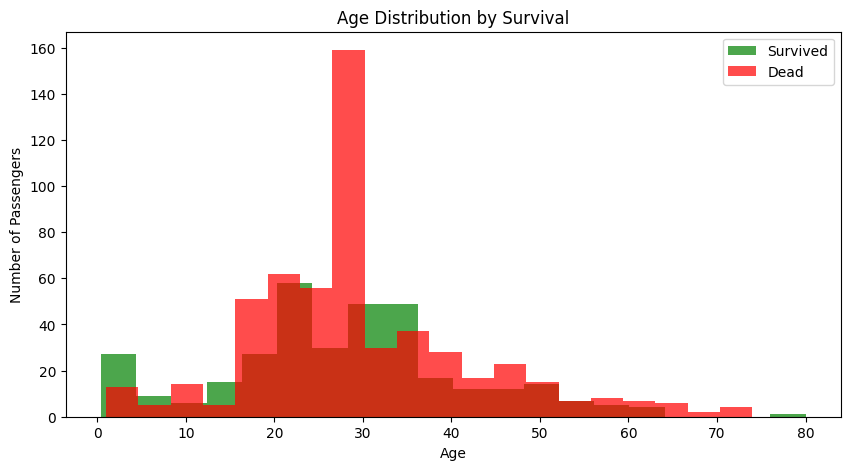

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Гистограмма для выживших
plt.hist(train_data[train_data['Survived']==1]['Age'].dropna(), bins=20, alpha=0.7, label='Survived', color='green')

# Гистограмма для погибших
plt.hist(train_data[train_data['Survived']==0]['Age'].dropna(), bins=20, alpha=0.7, label='Dead', color='red')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


*Что показывает график:*
Зеленая гистограмма — возраст пассажиров, которые выжили.
Красная гистограмма — возраст пассажиров, которые погибли.

Видно, что дети и молодые пассажиры выживали чаще, а пожилые пассажиры чаще погибали.

c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


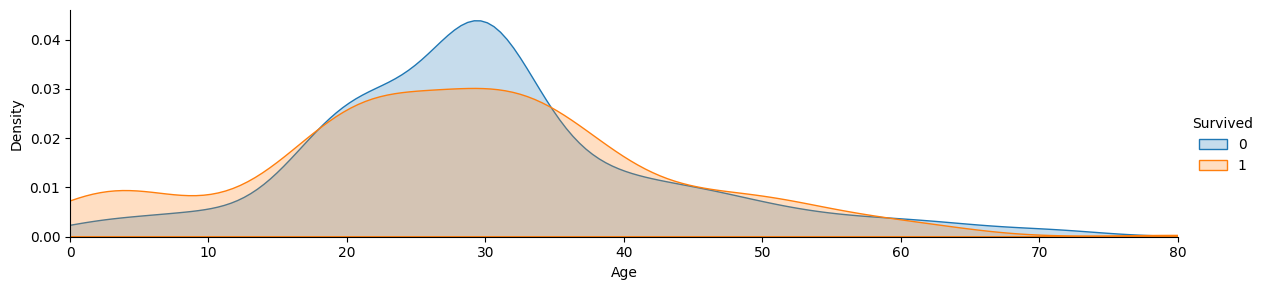

In [37]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.show() 

#показатель  смерти и выживания при 0=смерть 1=жив среди группы от 0 до 08 лет

Кривая для выживших (Survived = 1) и для погибших (Survived = 0).
Для детей 0–8 лет видно, что вероятность выживания выше, чем для погибших.

Это подтверждает, что дети имели больше шансов выжить на Титанике.

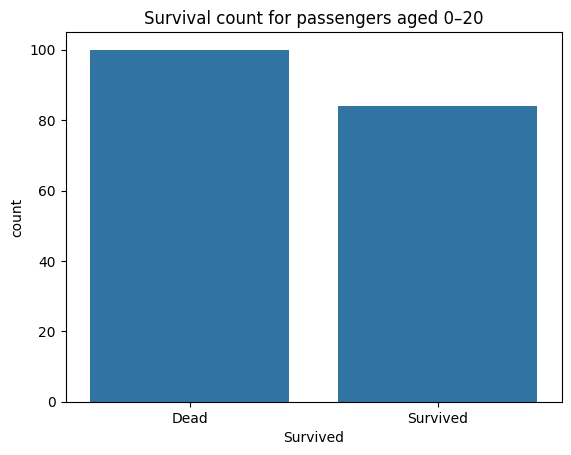

In [38]:
sns.countplot( data=train_data[train_data['Age'] <= 20],x='Survived')
plt.xticks([0,1], ['Dead', 'Survived'])
plt.title('Survival count for passengers aged 0–20')
plt.show()

Сравнивается число выживших и погибших среди пассажиров до 20 лет.

Обычно видно, что дети и подростки выживали чаще, чем взрослые, что подтверждает исторические данные о спасении детей в первую очередь.

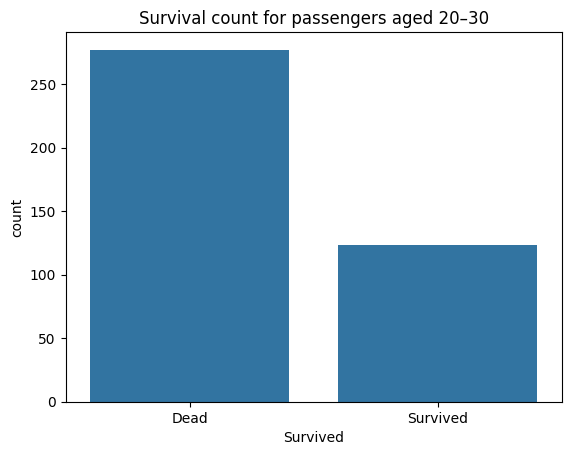

In [39]:
sns.countplot(data=train_data[(train_data['Age'] >= 20) & (train_data['Age'] <= 30)],x='Survived')
plt.xticks([0,1], ['Dead', 'Survived'])
plt.title('Survival count for passengers aged 20–30')
plt.show()



В возрастной группе 20–30 лет видно, что выживаемость примерно равна или немного ниже, чем среди детей и подростков.

Позволяет наглядно увидеть, как возраст влияет на шансы выживания.

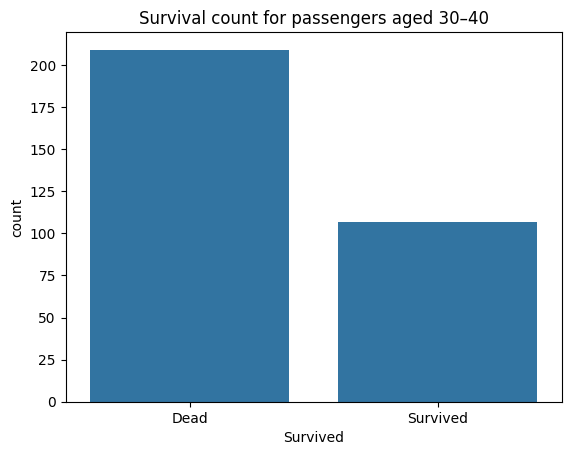

In [40]:
sns.countplot(data=train_data[(train_data['Age'] >= 30) & (train_data['Age'] <= 40)],x='Survived')
plt.xticks([0,1], ['Dead', 'Survived'])
plt.title('Survival count for passengers aged 30–40')
plt.show()


Столбцы показывают число выживших и погибших среди пассажиров 30–40 лет.

В этой возрастной группе погибших больше, чем выживших, что указывает на снижение шансов на выживание с возрастом.

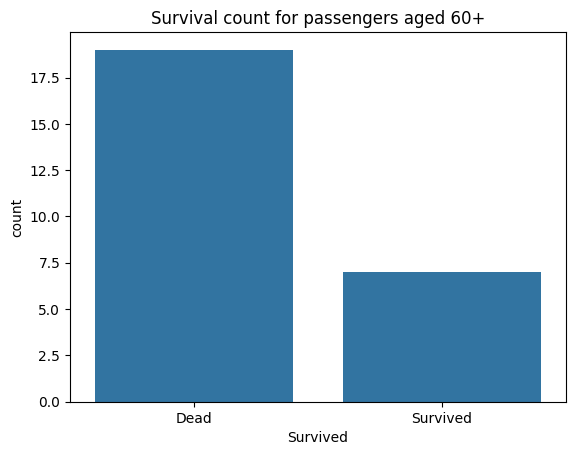

In [41]:
sns.countplot(data=train_data[train_data['Age'] >= 60], x='Survived')
plt.xticks([0,1], ['Dead', 'Survived'])
plt.title('Survival count for passengers aged 60+')
plt.show()

Столбцы показывают число выживших и погибших среди пассажиров старше 60 лет.

В этой возрастной группе выживших очень мало, что подтверждает тенденцию снижения шансов на выживание с возрастом.

# 4.4.2 Разбиение возраста на категории (Binning)

Мы конвертируем числовую переменную Age в категориальную:

*Категория Значение*

child	0

young	1

adult	2

mid-age	3

senior	4

In [47]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

#Преобразовали возраста на категории.Пример:1 категория= от 16 до 26 

In [46]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


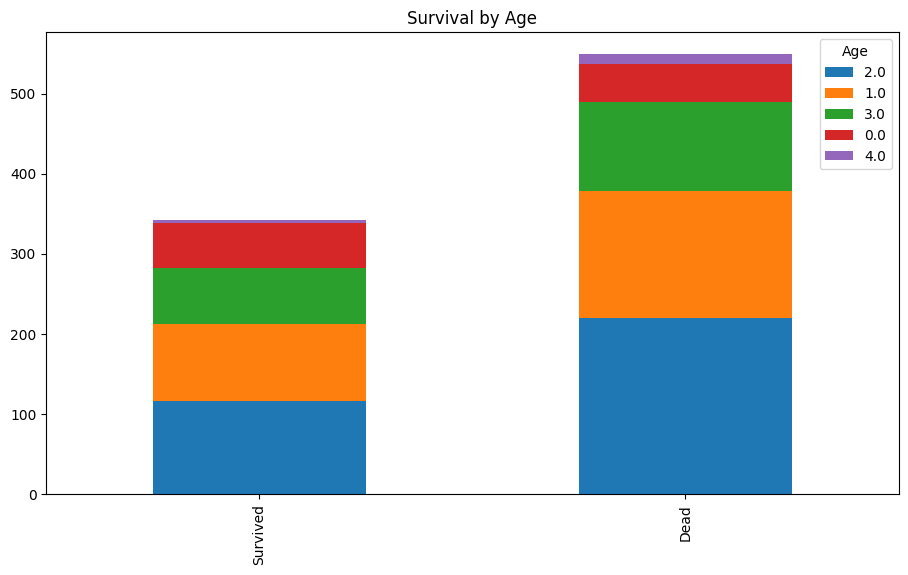

In [48]:
bar_chart('Age')

### 4.5 Embarked (Порт посадки)
4.5.1 Заполнение пропущенных значений

<Axes: >

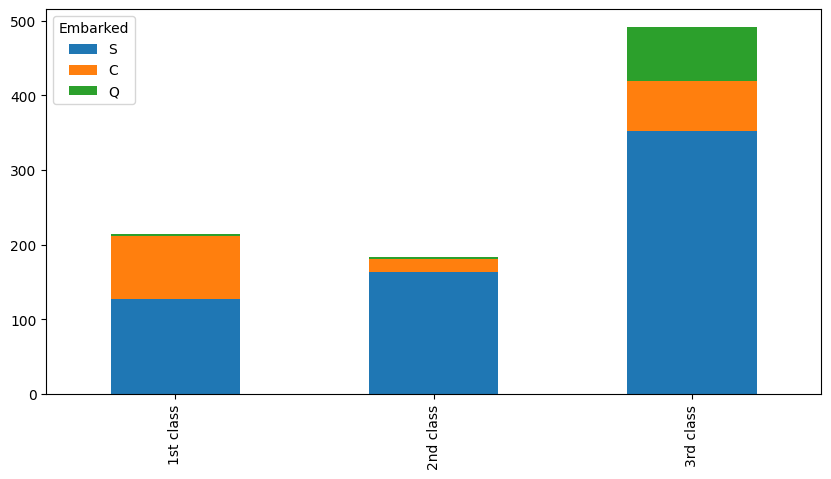

In [49]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

#рапсределение по портам и классам

Вывод:

Более 50% пассажиров каждого класса отправлялись из порта S (Southampton).

In [54]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('X')

#беремс столбец Embarked и заполняем все пустые ячейки портом 'X' 

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,NaN,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,NaN,0


In [52]:
embarked_mapping = {"X": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#Преобразуем столбец Ebmarked в числа

## 4.6 Fare (Цена билета)

In [51]:
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_data.head(50)

#Заполняем пустые в Fare медианным значениям исходя из его класса 

C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2359744251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2359744251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


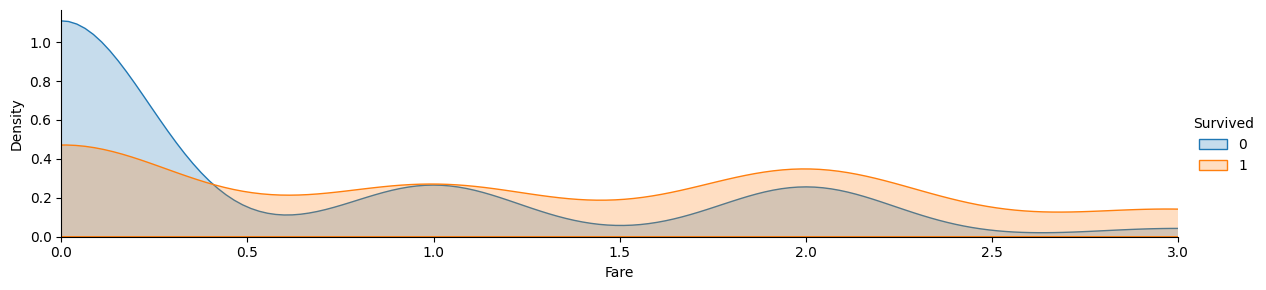

In [65]:
facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.show()


#распределение FARe среди выживших и погибших


In [58]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

#Разбиваем fare по категориям 


In [57]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,X,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,X,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C,X,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,X,0


In [56]:
train_data.Cabin.value_counts(dropna=False)
# Анализ столбца 'Cabin' на наличие пропущенных значений


Cabin
NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: count, dtype: int64

## 4.7 Cabin (Каюта)

In [55]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

#первая буква кабины 

In [66]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()

#сколько человек встречается на каждой палубе


<Axes: >

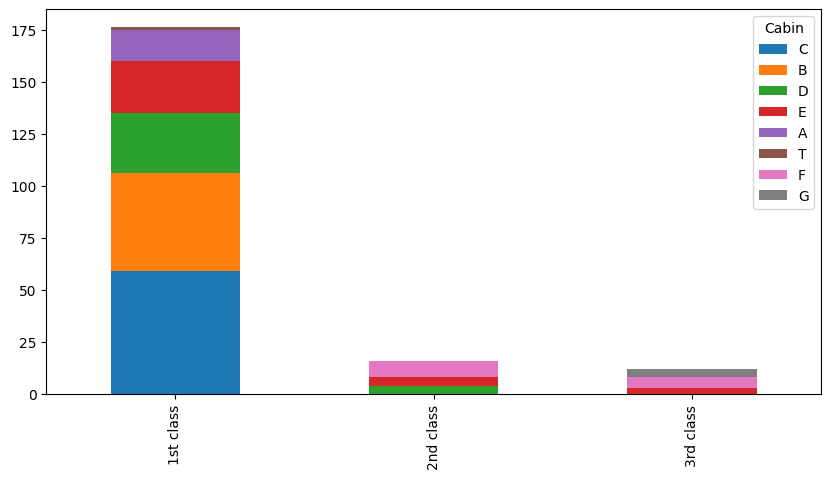

In [68]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [71]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
#Присваиваем каждой палубе(букве) число

In [72]:

train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

#Заполняем пропуски медианным значением основываясь на классах, так как мы прописали уже числовые знач для палуб


C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1812420830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1812420830.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

## 4.8 FamilySize (Размер семьи)

In [73]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1


#прописываем самого пассажира в семью


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


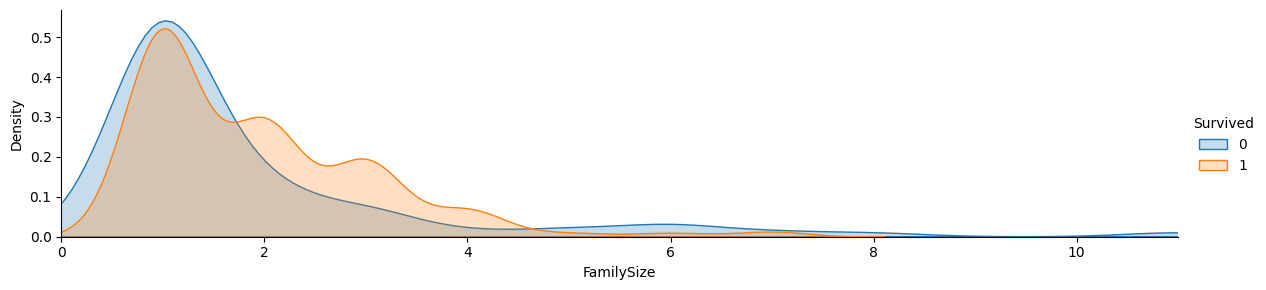

In [74]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train_data['FamilySize'].max()))
facet.add_legend()


Обычно видно, что очень маленькие семьи (1–2 человека) или очень большие семьи (>5 человек) имеют меньше шансов на выживание.

Семьи среднего размера (3–4 человека) чаще выживали.

Этот график помогает понять, как размер семьи влияет на шансы выживания на Титанике.

In [75]:
train_test_data = [train_data, test_data]


In [76]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    if 'FamilySize' in dataset.columns:
        dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
    else:
        print("В этом датасете нет FamilySize!")
    #переводим обьем семьи в дробные числа


In [77]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train_data.drop(features_drop, axis=1)
test = test_data.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

#удаляем лишние данные

In [78]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']


## 5. Моделирование (Modelling)

Импорт классификаторов:

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#импорт классификаторов для предсказания

In [80]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       0 non-null      float64
 6   Embarked    891 non-null    object 
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 62.8+ KB


## 6. Кросс-валидация (K-fold)

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# для точности 

## ИСПРАВЛЕНИЕ ВСЕХ ОШИБОК

In [85]:
# Преобразуем текстовые колонки в числа
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_data['Title'] = train_data['Title'].map({"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Other":3})
train_data['Cabin'] = train_data['Cabin'].fillna(0)  # если есть пропуски
train_data['Cabin'] = train_data['Cabin'].map({"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8})

print(train_data.dtypes)


Pclass          int64
Sex           float64
Age           float64
Fare          float64
Cabin         float64
Embarked      float64
Title         float64
FamilySize    float64
dtype: object


In [86]:
print(train_data.shape)  
print(target.shape)     


(891, 8)
(891,)


In [88]:
for col in train_data.columns:
    if train_data[col].isnull().sum() > 0:
        if train_data[col].dtype == 'float64' or train_data[col].dtype == 'int64':
            # числовые: заполняем медианой
            train_data[col].fillna(train_data[col].median(), inplace=True)
        else:
            # категориальные: заполняем модой
            train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Проверяем, что NaN больше нет
print(train_data.isnull().sum())




Pclass          0
Sex           891
Age             0
Fare            0
Cabin         891
Embarked      891
Title         891
FamilySize      0
dtype: int64


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\437380939.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return

In [90]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, 
                 "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3,"Countess":3,
                 "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3,"Capt":3,"Sir":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [116]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('X')  # можно оставить 'X'
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [117]:
# Заполнение пропущенных значений в столбце 'Fare' медианным значением по группам 'Pclass'
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)    

C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1028042546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1028042546.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [121]:
for dataset in train_test_data:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)       

C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\3498729913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\3498729913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [122]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [123]:
for dataset in train_test_data:
    dataset['Fare'].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2615930506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Fare'].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)


In [124]:
train_data = train.drop('Survived', axis=1)
target = train ['Survived']

In [125]:
print(train_data.info())
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       0 non-null      float64
 5   Embarked    891 non-null    object 
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 55.8+ KB
None
Pclass          0
Sex             0
Age             0
Fare            0
Cabin         891
Embarked        0
Title           0
FamilySize      0
dtype: int64


In [126]:
# Числовые колонки заполняем медианой
for col in ['Age', 'Fare', 'Cabin', 'FamilySize']:
    if col in train_data.columns:
        train_data[col].fillna(train_data[col].median(), inplace=True)



C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1647367828.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\1647367828.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [127]:
for col in ['Embarked', 'Title']:
    if col in train_data.columns and train_data[col].notna().any():
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])


In [128]:
for col in ['Embarked', 'Title']:
    if col in train_data.columns and train_data[col].notna().any():
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])


In [129]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)


In [130]:
train_data.dtypes


Pclass          int64
Sex             int64
Age           float64
Fare          float64
Cabin         float64
Embarked      float64
Title           int64
FamilySize    float64
dtype: object

In [131]:
train_data.isnull().sum()


Pclass          0
Sex             0
Age             0
Fare            0
Cabin         891
Embarked      891
Title           0
FamilySize      0
dtype: int64

In [132]:
# Fare
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Cabin
train_data['Cabin'].fillna(train_data['Cabin'].median(), inplace=True)

# Embarked
train_data['Embarked'].fillna(train_data['Embarked'].median(), inplace=True)

# Проверяем
train_data.isnull().sum()


C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2256678039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2256678039.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series th

Pclass          0
Sex             0
Age             0
Fare            0
Cabin         891
Embarked      891
Title           0
FamilySize      0
dtype: int64

In [141]:
train_data_filled = train_data.copy()

for col in train_data_filled.columns:
    if train_data_filled[col].isnull().sum() > 0:
        median_value = train_data_filled[col].median()  # вычисляем медиану
        train_data_filled[col] = train_data_filled[col].fillna(median_value)  # явное присваивание


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [145]:
# Перед этим убедитесь, что столбец не пуст
if train_data_filled[col].notna().any():
    median_val = train_data_filled[col].median()
    train_data_filled[col] = train_data_filled[col].fillna(median_val)


In [147]:
# 2. Заполним пропуски

# Для числовых столбцов используем медиану
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Для категориальных (если остались) используем моду (самое частое)
cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Проверим снова
print(train_data.isnull().sum())


Pclass          0
Sex             0
Age             0
Fare            0
Cabin         891
Embarked      891
Title           0
FamilySize      0
dtype: int64


C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2642892512.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_5020\2642892512.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [148]:
for col in ['Age', 'Fare']: # Список столбцов для заполнения
    if train_data_filled[col].notna().any():
        median_val = train_data_filled[col].median()
        train_data_filled[col] = train_data_filled[col].fillna(median_val)


In [151]:
print(train_data_filled.isnull().sum())



Pclass          0
Sex             0
Age             0
Fare            0
Cabin         891
Embarked      891
Title           0
FamilySize      0
dtype: int64


In [153]:
train_data_filled = train.copy()


In [154]:
# 1. Заполнение пропусков числовых столбцов медианой
for col in ['Age', 'Fare', 'Cabin', 'FamilySize']:
    train_data_filled[col] = train_data_filled[col].fillna(train_data_filled[col].median())


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [156]:
train_data_filled = train_data.copy()
train_data_filled = train_data_filled.drop(['Cabin'], axis=1)


In [158]:
train_data_filled = train_data.copy()


In [159]:
train_data_filled = train_data_filled.drop(['Cabin'], axis=1)


In [162]:
# Создаем копию данных
train_data_filled = train_data.copy()


In [163]:
# Столбец Embarked полностью пустой, заполним его нулями (или модой, если есть смысл)
train_data_filled['Embarked'] = train_data_filled['Embarked'].fillna(0)


In [164]:

# Проверяем, что пропусков больше нет
print(train_data_filled.isnull().sum())

Pclass          0
Sex             0
Age             0
Fare            0
Cabin         891
Embarked        0
Title           0
FamilySize      0
dtype: int64


In [165]:
train_data_filled['Cabin'] = train_data_filled['Cabin'].fillna(0)


## 6.2.1 kNN
KNeighborsClassifier (kNN) — Метод ближайших соседей

Что делает:
Определяет класс (например, выжил/не выжил) для нового объекта на основе классов k ближайших объектов в обучающей выборке.

Принцип:

Выбираем число соседей k (например, 13).

Для нового пассажира смотрим k самых близких пассажиров по признакам (возраст, пол, класс билета и др.).

Класс нового пассажира определяется голосованием соседей (какой класс чаще встречается среди ближайших).

Когда работает хорошо:
Когда признаки числовые, данные достаточно плотные, и между классами нет резких границ.

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

clf = KNeighborsClassifier(n_neighbors=13)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

score = cross_val_score(clf, train_data_filled, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)


[0.83333333 0.79775281 0.83146067 0.76404494 0.78651685 0.83146067
 0.85393258 0.84269663 0.84269663 0.82022472]


In [173]:
round(np.mean(score)*100, 2)

np.float64(82.04)

## 6.2.2 Decision Tree
DecisionTreeClassifier — Дерево решений

Что делает:
Разбивает данные на узлы и ветви, чтобы на каждом шаге минимизировать “нечистоту” (например, Gini или энтропию).

Принцип:

Выбирается признак, который лучше всего разделяет данные на группы по целевому классу.

Деление повторяется рекурсивно, пока не достигнут критерий остановки (например, минимальное количество объектов в листе).

Новый объект проходит по дереву, и его класс определяется листом дерева, куда он попал.

Особенность:
Простое и наглядное объяснение решения, но может переобучаться на небольших выборках.

In [174]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.82022472 0.84269663 0.78651685 0.84269663 0.78651685
 0.88764045 0.82022472 0.76404494 0.84269663]


In [175]:
round(np.mean(score)*100, 2)

np.float64(81.71)

## 6.2.3 Random Forest
RandomForestClassifier — Случайный лес

Что делает:
Создаёт несколько деревьев решений и объединяет их решения (голосование).

Принцип:

Каждое дерево обучается на случайной части выборки (бутстрэп).

При выборе признаков для разделения в каждом узле используется случайная подвыборка признаков.

Класс объекта определяется по большинству голосов деревьев.

Особенность:
Более устойчив к переобучению, чем одно дерево, хорошо работает на разнородных данных.

In [176]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.85393258 0.80898876 0.75280899 0.83146067 0.79775281
 0.86516854 0.82022472 0.74157303 0.86516854]


In [177]:
round(np.mean(score)*100, 2)

np.float64(81.48)

## 6.2.4 Naive Bayes
GaussianNB — Наивный Байес

Что делает:
Оценивает вероятность принадлежности объекта к классу на основе вероятности признаков при этом классе, используя формулу Байеса.

Принцип:

Для каждого признака и класса вычисляется вероятность.

Предполагается, что признаки независимы между собой (наивное предположение).

Класс объекта определяется по максимальной апостериорной вероятности.

Особенность:
Прост и быстр, хорошо работает на категориальных и числовых данных, но на сильно зависимых признаках точность может падать.

In [181]:
clf = GaussianNB()
scoring = 'accuracy'
clf = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classifier', GaussianNB())])
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.79775281 0.79775281 0.75280899 0.80898876
 0.83146067 0.80898876 0.83146067 0.84269663]


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cab

In [182]:
round(np.mean(score)*100, 2)

np.float64(80.58)

## 6.2.5 SVC
SVC (Support Vector Classifier) — Метод опорных векторов

Что делает:
Ищет границу (гиперплоскость), которая максимально разделяет классы (например, выжил/не выжил).

Принцип:

Находит линию/плоскость, которая максимально увеличивает расстояние до ближайших объектов разных классов.

Эти ближайшие объекты называются опорными векторами.

Можно использовать разные ядра (linear, poly, rbf) для разделения сложных данных.

Особенность:
Работает хорошо с небольшими, высокоразмерными наборами данных, но чувствителен к шуму.

In [184]:
clf = SVC()
scoring = 'accuracy'
clf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', SVC())
])
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.82022472 0.82022472 0.80898876 0.80898876
 0.84269663 0.85393258 0.84269663 0.84269663]


c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Акылай\OneDrive\Desktop\my git\titanic\.venv\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Cab

In [185]:
round(np.mean(score)*100,2)

np.float64(82.83)

## 7. Testing

In [ ]:
# Prepare test data
test_data = test.drop("PassengerId", axis=1).copy()

# Fill missing values in Embarked (convert text to numeric if needed)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping).fillna(0)

# Fill missing Cabin values with 0
test_data['Cabin'] = test_data['Cabin'].fillna(0)

# Drop Ticket column if it exists
if 'Ticket' in test_data.columns:
	test_data = test_data.drop('Ticket', axis=1)

# Train and predict with SVC
clf = SVC()
clf.fit(train_data_filled, target)
prediction = clf.predict(test_data)


ValueError: could not convert string to float: 'X'

In [204]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [205]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
